In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("data/Employee.csv")
print(df.shape)
df.head()

(4653, 9)


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
# Checking null values
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [6]:
y = df.LeaveOrNot
x = df.drop(['LeaveOrNot'], axis = 1)

<AxesSubplot:xlabel='Education', ylabel='count'>

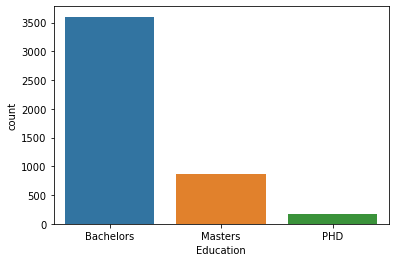

In [7]:
sns.countplot(x=df["Education"])

<AxesSubplot:xlabel='Age'>

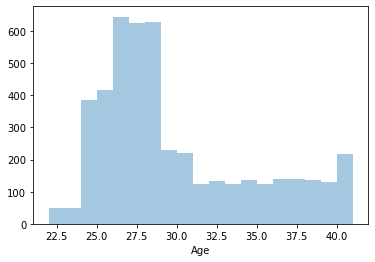

In [9]:
sns.distplot(df.Age, kde = False, bins = 19)

> Mot of the data is from 24 to 31 years of age. 

In [10]:
num = x.select_dtypes(exclude = 'object')
char = x.select_dtypes(include = 'object')

In [11]:
assert num.shape[1] + char.shape[1] == x.shape[1], "Shape not same"

In [12]:
num.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain
count,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652
std,1.863377,0.561435,4.826087,1.558240
min,2012.000000,1.000000,22.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000
50%,2015.000000,3.000000,28.000000,3.000000
75%,2017.000000,3.000000,32.000000,4.000000
max,2018.000000,3.000000,41.000000,7.000000


<AxesSubplot:>

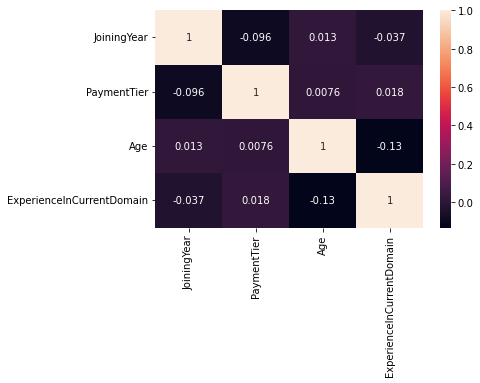

In [13]:
sns.heatmap(num.corr(), annot = True)

In [86]:
# Categorical Features

ohe = OneHotEncoder()
ohe_transformed = ohe.fit_transform(char).toarray()
print(ohe.categories_)
# Creating new DataFrame using ohe
ohe_fe = pd.DataFrame(ohe_transformed)
# Converting column names form int to str so it won't give problem while modelling
ohe_fe.columns = [f'Column_{i+1}' for i in range(ohe_fe.shape[1])]
ohe_fe

[array(['Bachelors', 'Masters', 'PHD'], dtype=object), array(['Bangalore', 'New Delhi', 'Pune'], dtype=object), array(['Female', 'Male'], dtype=object), array(['No', 'Yes'], dtype=object)]


,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4648,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4649,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4650,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4651,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [76]:
main_df = pd.concat([num, ohe_fe], axis = 1)
main_df

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10
0,2017,3,34,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2013,1,28,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2014,3,38,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2016,3,27,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2017,3,24,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4649,2013,2,37,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4650,2018,3,27,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4651,2012,3,30,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [71]:
y.value_counts()

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

In [78]:
xtrain, xtest, ytrain, ytest = train_test_split(main_df, y, test_size = 0.2, random_state = 42 )

In [79]:
print(ytrain.mean())
print(ytest.mean())

0.34363245566899514
0.3447905477980666


Accuracy Score:  0.7432867883995704
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       610
           1       0.69      0.46      0.55       321

    accuracy                           0.74       931
   macro avg       0.73      0.68      0.69       931
weighted avg       0.74      0.74      0.73       931



<AxesSubplot:>

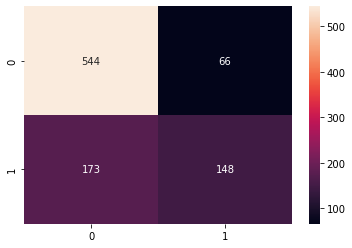

In [80]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
y_pred_lr = lr.predict(xtest)
print('Accuracy Score: ', accuracy_score(ytest, y_pred_lr))
print('Classification Report: \n', classification_report(ytest, y_pred_lr))
sns.heatmap(confusion_matrix(ytest, y_pred_lr), annot = True, fmt = '0.4g')

Accuracy Score:  0.6552094522019334
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      1.00      0.79       610
           1       0.00      0.00      0.00       321

    accuracy                           0.66       931
   macro avg       0.33      0.50      0.40       931
weighted avg       0.43      0.66      0.52       931



<AxesSubplot:>

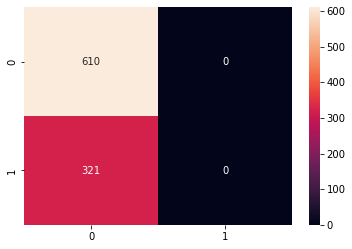

In [81]:
svc = SVC()
svc.fit(xtrain, ytrain)
y_pred_svc = svc.predict(xtest)
print('Accuracy Score: ', accuracy_score(ytest, y_pred_svc))
print('Classification Report: \n', classification_report(ytest, y_pred_svc))
sns.heatmap(confusion_matrix(ytest, y_pred_svc), annot = True, fmt = '0.4g')

Accuracy Score:  0.841031149301826
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       610
           1       0.80      0.72      0.76       321

    accuracy                           0.84       931
   macro avg       0.83      0.81      0.82       931
weighted avg       0.84      0.84      0.84       931



<AxesSubplot:>

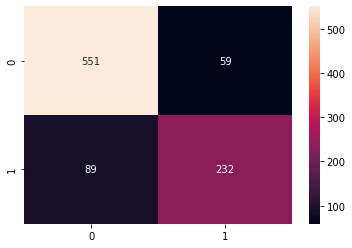

In [82]:
dtree = DecisionTreeClassifier()
dtree.fit(xtrain, ytrain)
y_pred_dtree = dtree.predict(xtest)
print('Accuracy Score: ', accuracy_score(ytest, y_pred_dtree))
print('Classification Report: \n', classification_report(ytest, y_pred_dtree))
sns.heatmap(confusion_matrix(ytest, y_pred_dtree), annot = True, fmt = '0.4g')

Accuracy Score:  0.849624060150376
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       610
           1       0.81      0.73      0.77       321

    accuracy                           0.85       931
   macro avg       0.84      0.82      0.83       931
weighted avg       0.85      0.85      0.85       931



<AxesSubplot:>

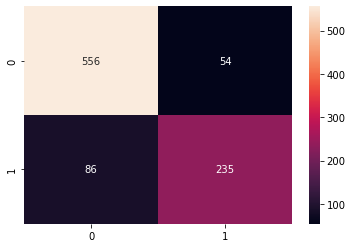

In [83]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
y_pred_rf = rf.predict(xtest)
print('Accuracy Score: ', accuracy_score(ytest, y_pred_rf))
print('Classification Report: \n', classification_report(ytest, y_pred_rf))
sns.heatmap(confusion_matrix(ytest, y_pred_rf), annot = True, fmt = '0.4g')

Accuracy Score:  0.8625134264232008
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       610
           1       0.86      0.72      0.78       321

    accuracy                           0.86       931
   macro avg       0.86      0.83      0.84       931
weighted avg       0.86      0.86      0.86       931



<AxesSubplot:>

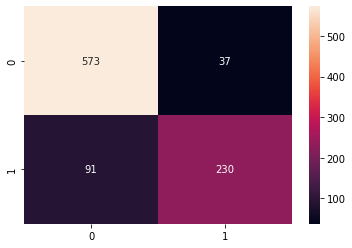

In [84]:
xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)
y_pred_xgb = xgb.predict(xtest)
print('Accuracy Score: ', accuracy_score(ytest, y_pred_xgb))
print('Classification Report: \n', classification_report(ytest, y_pred_xgb))
sns.heatmap(confusion_matrix(ytest, y_pred_xgb), annot = True, fmt = '0.4g')

In [24]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(ytest, y_pred_xgb)
print('roc_auc_score for XG Boost: ', roc_auc_score(ytest, y_pred_xgb))


roc_auc_score for XG Boost:  0.8279275828609366


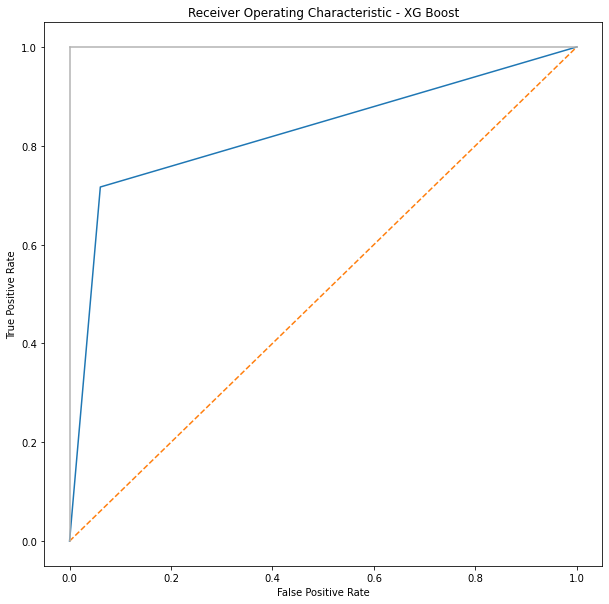

In [25]:
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - XG Boost')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [26]:
print('Accuracy Score XG Boost: ', accuracy_score(ytest, y_pred_rf))

Accuracy Score XG Boost:  0.8560687432867884


In [87]:
# Saving Model

import pickle5 as pickle
pickle.dump(xgb, open('emplyeechurn xgb.sav', 'wb'))
pickle.dump(ohe, open('ohe.sav', 'wb'))


In [88]:
# Loading Model
loaded_model = pickle.load(open('emplyeechurn xgb.sav', 'rb'))
loaded_ohe = pickle.load(open('ohe.sav', 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.8625134264232008
